In [9]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

In [3]:
data_path = Path("./../data")
train_folder = data_path / "train"
test_folder = data_path / "test"
train_csv = data_path / "train.csv"
test_csv = data_path / "test.csv"

In [4]:
train_df = pd.read_csv(train_csv)
train_df.head()

,image_id,label
0,46514481-2d8b-4d49-8991-012e1bfd34f6.jpeg,swimming
1,ec66e513-adac-4a30-b6a9-3d647ee6e46b.jpeg,greco-Roman_wrestling
2,4d60732e-d680-4bfd-9067-70ff8137f537.jpeg,running
3,93327011-8e3d-4f0d-849d-a26ddaf6488b.jpeg,football
4,b6853478-48c1-48b2-b104-74903730c831.jpeg,sailing


In [5]:
labels = sorted(train_df.label.unique())
label_enc = {label: i for i, label in enumerate(labels)}
label_dec = {num: label for label, num in label_enc.items()}
train_df['target'] = train_df.label.apply(func=lambda x: label_enc.get(x))

In [90]:
tts = train_df.groupby("target").count()['label'] / sum(train_df.groupby("target").count()['label'])
max(tts)

0.05551759857183788

<Axes: >

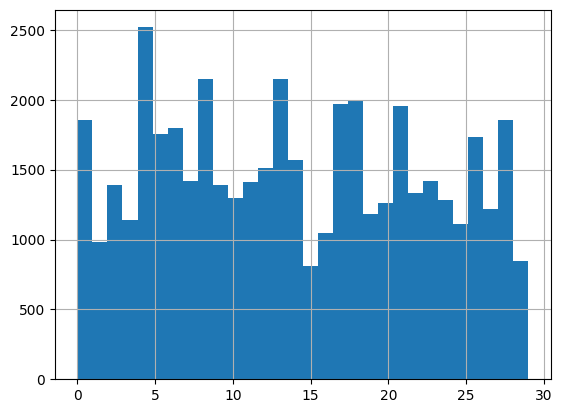

In [43]:
train_df.target.hist(bins=len(labels))

In [6]:
def plot_img_by_id(id_num: int):
    im_path = train_folder / train_df.image_id[id_num]
    img = cv2.imread(str(im_path), cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

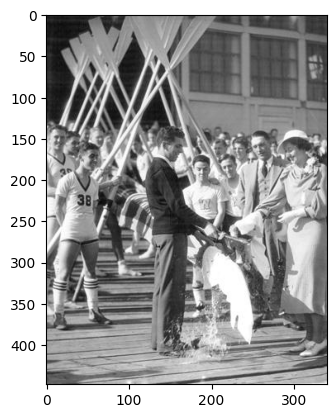

In [8]:
plot_img_by_id(319)

In [10]:
ws, hs, chs = [], [], []
for idx, img_name in train_df.image_id.items():
    path = train_folder / img_name
    img = Image.open(path)
    h, w = img.size
    ch = len(img.getbands())
    if ch == 1:
        print(idx)
    ws.append(w)
    hs.append(h)
    chs.append(ch) 


319
438
698
1723
1733
2297
4818
4840
5082
6220
6791
7659
8102
8185
9308
9506
9943
9987
10232
10914
11816
12014
13235
14022
15290
17395
17837
18509
19787
20349
20356
20373
20573
20720
20982
22136
23902
24598
27400
28045
28377
28483
29599
30309
30928
31097
31177
32653
33305
33367
33381
33997
34340
34523
34821
35118
35846
37081
37479
38410
38693
38894
39896
40164
40220
40478
41738
41781
41860
41868
42123
43205
43293
44333
44443
44540
44900
44940
44962
45160


In [11]:
train_df['height'] = hs
train_df['width'] = ws
train_df['channels'] = chs

In [79]:
train_df[(train_df['height'] < 100) | (train_df['width'] < 100)]

,image_id,label,target,height,width,channels
1440,788d2911-7017-43e4-b9c6-5d952bd33b3d.jpeg,badminton,3,140,93,3
1581,ca1d2b9e-ab8e-47b9-9cbe-f40cfd6c4723.jpeg,alpinism,0,120,90,3
2189,d9553098-e00a-4c24-9777-2a47bd27a34b.jpeg,javelin-throwing,15,87,140,3
3523,025fbbcf-4faa-402e-8b90-8caddf50c319.jpeg,pole_vault,16,32,32,3
3663,4872c507-396f-48b1-9f6b-41c4a55df2ce.jpeg,alpinism,0,120,80,3
4656,ac368009-db84-4797-9ccd-57a269714e39.jpeg,rugby,17,87,130,3
5783,d335dfca-34a2-4241-8215-a4a4b53ea540.jpeg,alpinism,0,120,80,3
5980,59cfabb2-19a0-4cc6-993e-5c17a6056ee7.jpeg,alpinism,0,80,120,3
6468,8693ae8e-adaa-4b97-87b0-c351cf7c46e7.jpeg,badminton,3,93,140,3
6547,1faa25a6-09a8-4a1a-aea0-9464fea388f4.jpeg,water_polo,29,93,140,3


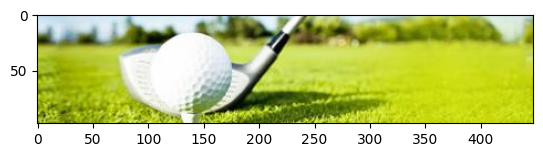

In [81]:
plot_img_by_id(35504)

In [12]:
len([c for c in chs if c < 3])

80